In [ ]:
#JaymarCezar

In [1]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 6.3 MB/s 


## SET-UP

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 7)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common import
import numpy as np
import os
import matplotlib.pyplot as plt



In [3]:
# Set-up
import pandas as pd
import numpy as np
pd.set_option('display.min_rows', 20)

In [4]:
#upload data from local files
#from google.colab import files
#uploaded = files.upload()

In [5]:
  #get data from google drive

from google.colab import drive
drive.mount('/content/drive')

ROOT_PATH = '/content/drive/My Drive/Datasets'
TRAINING_SET_PATH = ROOT_PATH + '/Training Set.csv'
TEST_SET_PATH = ROOT_PATH + '/Test Set.csv'
VALIDATION_SET_PATH = ROOT_PATH + '/Validation Set.csv'

Mounted at /content/drive


In [6]:
#Load Training data
def load_training_data():
  train = open(TRAINING_SET_PATH)
  return pd.read_csv(train)
  
TrainingSet = load_training_data()
print(TrainingSet.shape)
TrainingSet.head()


(13727, 5)


,ID,title,post,class_name,class_id
0,691324c4-5c30-44e0-b9e4-45b4f0715e21,a question about the third conditional.,i was making questions for my students and i r...,none,5
1,d4295391-9ca5-4398-b7c8-687e4a984ef1,the epitome of my life,i've recently requested testing accommodations...,adhd,0
2,58937fa5-3c2c-426b-8255-5a140fbab675,what are your favourites offbeat destinations ...,**cambodia** * koh rong: amazing beaches and a...,none,5
3,7daf364c-3b33-4cbe-be37-a214edf9a73e,synesthesia survey (what colour is each month ...,synesthesia. what is synesthesia? according to...,none,5
4,22518271-4bb4-4caf-b683-7305da519288,"science ama series: i’m phil baran, and i’m he...",i’m phil baran and i teach organic chemistry a...,none,5


In [7]:
#Training Set info
TrainingSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13727 entries, 0 to 13726
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          13727 non-null  object
 1   title       13727 non-null  object
 2   post        13727 non-null  object
 3   class_name  13727 non-null  object
 4   class_id    13727 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 536.3+ KB


class_name
adhd          2465
depression    2450
anxiety       2422
bipolar       2407
ptsd          2001
none          1982
dtype: int64


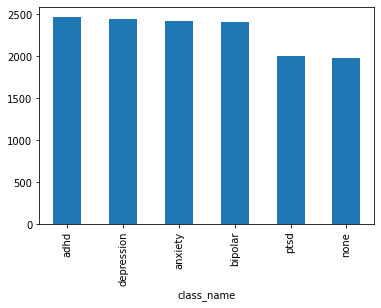

In [8]:
TrainingSet.groupby('class_name').size().sort_values(ascending=False).plot.bar(ylim=0)
print(TrainingSet.groupby('class_name').size().sort_values(ascending=False))

plt.show()

In [9]:
def load_test_data():
  test = open(TEST_SET_PATH)
  return pd.read_csv(test)
  
TestSet = load_test_data()
print(TestSet.shape)
TestSet.head()

(1488, 5)


,ID,title,post,class_name,class_id
0,b07b978c-7760-4932-85cb-5797b5e74168,"basic needs for neurotypicals : food, clothing...",most people able to be productive and function...,adhd,0
1,b2868fd2-e885-400e-b780-446c9581b1f1,"""you're just an iphone in an android world.: d...",i'm 23f and recently quit my job as a features...,adhd,0
2,3191b3b1-d355-41b6-9588-caeb3e169c9b,"""what kind of music do you listen to?"" no answer",i just got finished with an interview and as t...,adhd,0
3,a3d60895-ef7c-4b57-b5be-632c9fd62150,couldn’t help crying while reading a post that...,off course i’ve forgotten what i exactly read....,adhd,0
4,66fae18e-e744-495f-b7a0-b985543f5052,shout-out to all the parents with adhd childre...,"i have six siblings, and at least 4 of us have...",adhd,0


In [10]:
def load_validation_data():
  validation = open(VALIDATION_SET_PATH)
  return pd.read_csv(validation)
  
ValidationSet = load_validation_data()
print(ValidationSet.shape)
ValidationSet.head()

(1488, 5)


,ID,title,post,class_name,class_id
0,34db02f0-82ed-43e9-ac8b-65db8ba55a95,do others feel like they have a warped sense o...,i have read others talking about how add/adhd ...,adhd,0
1,f515fc3a-0f62-4203-bfc8-53a8252a8fc1,do you ever feel like one small failure can de...,"last night, i thought i had enough time to fin...",adhd,0
2,93ed44ff-20b8-4bc2-b71b-6c7a39fa4775,so you've heard about getting a song in your h...,... random words in your head that won't go aw...,adhd,0
3,e9ec2f5b-f709-40c4-b4f2-202ebbe5bc87,anyone here have listening comprehension probl...,"it's like i can hear what people say, but ofte...",adhd,0
4,2e6f28e3-acbe-44ac-82f0-a980aa07a464,i finally found a way to wake my ass up in the...,not sure if i'm alone in struggling to get out...,adhd,0


class_name
adhd          2961
depression    2946
anxiety       2918
bipolar       2903
ptsd          2497
none          2478
dtype: int64
(16703, 5)


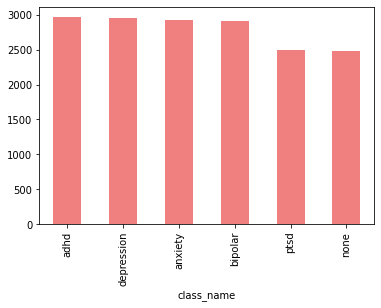

In [11]:
train_test_val = pd.concat([TrainingSet,TestSet,ValidationSet], ignore_index=True)
train_test_val.groupby('class_name').size().sort_values(ascending=False).plot.bar(ylim=0,color='lightcoral')
print(train_test_val.groupby('class_name').size().sort_values(ascending=False))
print(train_test_val.shape)
plt.show()

## **DATA CLEANING - TRAINING SET**

In [12]:
#Drop columns: ID 
TrainingSet = TrainingSet.drop(columns=['ID'])
TrainingSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13727 entries, 0 to 13726
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       13727 non-null  object
 1   post        13727 non-null  object
 2   class_name  13727 non-null  object
 3   class_id    13727 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 429.1+ KB


In [13]:
#Normalizing text(to lower case)

TrainingSet['title'] = TrainingSet['title'].str.lower()
TrainingSet['post'] = TrainingSet['post'].str.lower()
TrainingSet['class_name'] = TrainingSet['class_name'].str.lower()
TrainingSet.head()


,title,post,class_name,class_id
0,a question about the third conditional.,i was making questions for my students and i r...,none,5
1,the epitome of my life,i've recently requested testing accommodations...,adhd,0
2,what are your favourites offbeat destinations ...,**cambodia** * koh rong: amazing beaches and a...,none,5
3,synesthesia survey (what colour is each month ...,synesthesia. what is synesthesia? according to...,none,5
4,"science ama series: i’m phil baran, and i’m he...",i’m phil baran and i teach organic chemistry a...,none,5


In [14]:
TrainingSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13727 entries, 0 to 13726
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       13727 non-null  object
 1   post        13727 non-null  object
 2   class_name  13727 non-null  object
 3   class_id    13727 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 429.1+ KB


In [15]:
TrainingSet = TrainingSet.astype("string")
TrainingSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13727 entries, 0 to 13726
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       13727 non-null  string
 1   post        13727 non-null  string
 2   class_name  13727 non-null  string
 3   class_id    13727 non-null  string
dtypes: string(4)
memory usage: 429.1 KB


In [16]:
#Remove html
import string
from bs4 import BeautifulSoup

def clean_html(html):

    # parse html content
    soup = BeautifulSoup(html, "html.parser")

    for data in soup(['style', 'script', 'code', 'a']):
        # Remove tags
        data.decompose()

    # return data by retrieving the tag content
    return ' '.join(soup.stripped_strings)

TrainingSet['title'] = TrainingSet['title'].apply(lambda x: clean_html(x))
TrainingSet['post'] = TrainingSet['post'].apply(lambda x: clean_html(x))

In [17]:
#REMOVING STOPWORDS AND NON-ASCII CHARACTERS, Lemmatize, Removing punctuation
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import re

stemmer = SnowballStemmer("english")
lemma = nltk.WordNetLemmatizer()
words = stopwords.words("english")

TrainingSet['title'] = TrainingSet['title'].apply(lambda x: " ".join([lemma.lemmatize(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]))
TrainingSet['post'] = TrainingSet['post'].apply(lambda x: " ".join([lemma.lemmatize(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]))


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
'''#Remove words with less than 3 letters
TrainingSet['title'] = TrainingSet.title.str.replace(r'\b(\w{1,2})\b','')
TrainingSet['post'] = TrainingSet.post.str.replace(r'\b(\w{1,2})\b', '')
'''

"#Remove words with less than 3 letters\nTrainingSet['title'] = TrainingSet.title.str.replace(r'\x08(\\w{1,2})\x08','')\nTrainingSet['post'] = TrainingSet.post.str.replace(r'\x08(\\w{1,2})\x08', '')\n"

In [19]:
TrainingSet

,title,post,class_name,class_id
0,question third conditional,making question student ran little tricky gram...,none,5
1,epitome life,recently requested testing accommodation unive...,adhd,0
2,favourite offbeat destination asia list,cambodia koh rong amazing beach serene romanti...,none,5
3,synesthesia survey colour month,synesthesia synesthesia according google synes...,none,5
4,science ama series phil baran talk work baran ...,phil baran teach organic chemistry scripps res...,none,5
5,existential depression,life opinion worth struggle literally born go ...,depression,3
6,many found sub saying hey wonder exists manual...,want say grateful found sub grateful active co...,adhd,0
7,guy freak people express love affection,externally least internally long remember thou...,ptsd,4
8,overcame food anxiety ate big sandwich yay,best month struggling eat get anxious gonna pu...,anxiety,1
9,holding suicide sake others feel owe make want...,strange feeling long time finally able put wor...,depression,3


In [20]:
TrainingSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13727 entries, 0 to 13726
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       13727 non-null  object
 1   post        13727 non-null  object
 2   class_name  13727 non-null  string
 3   class_id    13727 non-null  string
dtypes: object(2), string(2)
memory usage: 429.1+ KB


In [21]:
TrainingSet[['title','post']] = TrainingSet[['title','post']].astype("string")
TrainingSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13727 entries, 0 to 13726
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       13727 non-null  string
 1   post        13727 non-null  string
 2   class_name  13727 non-null  string
 3   class_id    13727 non-null  string
dtypes: string(4)
memory usage: 429.1 KB


In [22]:
TrainingSet

,title,post,class_name,class_id
0,question third conditional,making question student ran little tricky gram...,none,5
1,epitome life,recently requested testing accommodation unive...,adhd,0
2,favourite offbeat destination asia list,cambodia koh rong amazing beach serene romanti...,none,5
3,synesthesia survey colour month,synesthesia synesthesia according google synes...,none,5
4,science ama series phil baran talk work baran ...,phil baran teach organic chemistry scripps res...,none,5
5,existential depression,life opinion worth struggle literally born go ...,depression,3
6,many found sub saying hey wonder exists manual...,want say grateful found sub grateful active co...,adhd,0
7,guy freak people express love affection,externally least internally long remember thou...,ptsd,4
8,overcame food anxiety ate big sandwich yay,best month struggling eat get anxious gonna pu...,anxiety,1
9,holding suicide sake others feel owe make want...,strange feeling long time finally able put wor...,depression,3


## **DATA CLEANING - TEST SET**

In [23]:
#Drop columns: ID
TestSet = TestSet.drop(columns=['ID'])

In [24]:
#Normalizing text(to lower case)

TestSet['title'] = TestSet['title'].str.lower()
TestSet['post'] = TestSet['post'].str.lower()
TestSet['class_name'] = TestSet['class_name'].str.lower()
TestSet.head()


,title,post,class_name,class_id
0,"basic needs for neurotypicals : food, clothing...",most people able to be productive and function...,adhd,0
1,"""you're just an iphone in an android world.: d...",i'm 23f and recently quit my job as a features...,adhd,0
2,"""what kind of music do you listen to?"" no answer",i just got finished with an interview and as t...,adhd,0
3,couldn’t help crying while reading a post that...,off course i’ve forgotten what i exactly read....,adhd,0
4,shout-out to all the parents with adhd childre...,"i have six siblings, and at least 4 of us have...",adhd,0


In [25]:
TestSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       1488 non-null   object
 1   post        1488 non-null   object
 2   class_name  1488 non-null   object
 3   class_id    1488 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 46.6+ KB


In [26]:
TestSet = TestSet.astype("string")
TestSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       1488 non-null   string
 1   post        1488 non-null   string
 2   class_name  1488 non-null   string
 3   class_id    1488 non-null   string
dtypes: string(4)
memory usage: 46.6 KB


In [27]:
#Remove html
import string
from bs4 import BeautifulSoup

def clean_html(html):

    # parse html content
    soup = BeautifulSoup(html, "html.parser")

    for data in soup(['style', 'script', 'code', 'a']):
        # Remove tags
        data.decompose()

    # return data by retrieving the tag content
    return ' '.join(soup.stripped_strings)

TestSet['title'] = TestSet['title'].apply(lambda x: clean_html(x))
TestSet['post'] = TestSet['post'].apply(lambda x: clean_html(x))

In [28]:
#REMOVING STOPWORDS AND NON-ASCII CHARACTERS, Lemmatize, Removing punctuation, Remove numbers
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import re

stemmer = SnowballStemmer("english")
lemma = nltk.WordNetLemmatizer()
words = stopwords.words("english")

TestSet['title'] = TestSet['title'].apply(lambda x: " ".join([lemma.lemmatize(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]))
TestSet['post'] = TestSet['post'].apply(lambda x: " ".join([lemma.lemmatize(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]))


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
TestSet

,title,post,class_name,class_id
0,basic need neurotypicals food clothing shelter...,people able productive functional basic need f...,adhd,0
1,iphone android world diagnosed adhd combinativ...,f recently quit job feature writer list fashio...,adhd,0
2,kind music listen answer,got finished interview bos walking door asked ...,adhd,0
3,help cry reading post made realize much learnt...,course forgotten exactly read emotion real wit...,adhd,0
4,shout parent adhd child thank best,six sibling least u adhd various flavor mother...,adhd,0
5,finally two week adhd medication proud functio...,thought never able get vyvanse adderall taken ...,adhd,0
6,response story successfully stopping med remem...,review magnetic resonance imaging mri study su...,adhd,0
7,working smarter harder making presentation con...,presentation every week giving project update ...,adhd,0
8,adhd lying bed thinking get dressed juuust lat...,practice start laying bed phone okay minute aw...,adhd,0
9,rely willpower,quick tip current willpower future expected ei...,adhd,0


In [30]:
'''#Remove words with less than 3 letters
TestSet['title'] = TestSet.title.str.replace(r'\b(\w{1,2})\b','')
TestSet['post'] = TestSet.post.str.replace(r'\b(\w{1,2})\b', '')
'''

"#Remove words with less than 3 letters\nTestSet['title'] = TestSet.title.str.replace(r'\x08(\\w{1,2})\x08','')\nTestSet['post'] = TestSet.post.str.replace(r'\x08(\\w{1,2})\x08', '')\n"

In [31]:
TestSet

,title,post,class_name,class_id
0,basic need neurotypicals food clothing shelter...,people able productive functional basic need f...,adhd,0
1,iphone android world diagnosed adhd combinativ...,f recently quit job feature writer list fashio...,adhd,0
2,kind music listen answer,got finished interview bos walking door asked ...,adhd,0
3,help cry reading post made realize much learnt...,course forgotten exactly read emotion real wit...,adhd,0
4,shout parent adhd child thank best,six sibling least u adhd various flavor mother...,adhd,0
5,finally two week adhd medication proud functio...,thought never able get vyvanse adderall taken ...,adhd,0
6,response story successfully stopping med remem...,review magnetic resonance imaging mri study su...,adhd,0
7,working smarter harder making presentation con...,presentation every week giving project update ...,adhd,0
8,adhd lying bed thinking get dressed juuust lat...,practice start laying bed phone okay minute aw...,adhd,0
9,rely willpower,quick tip current willpower future expected ei...,adhd,0


In [32]:
TestSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       1488 non-null   object
 1   post        1488 non-null   object
 2   class_name  1488 non-null   string
 3   class_id    1488 non-null   string
dtypes: object(2), string(2)
memory usage: 46.6+ KB


In [33]:
TestSet[['title','post']] = TestSet[['title','post']].astype("string")
TestSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       1488 non-null   string
 1   post        1488 non-null   string
 2   class_name  1488 non-null   string
 3   class_id    1488 non-null   string
dtypes: string(4)
memory usage: 46.6 KB


In [34]:
TestSet

,title,post,class_name,class_id
0,basic need neurotypicals food clothing shelter...,people able productive functional basic need f...,adhd,0
1,iphone android world diagnosed adhd combinativ...,f recently quit job feature writer list fashio...,adhd,0
2,kind music listen answer,got finished interview bos walking door asked ...,adhd,0
3,help cry reading post made realize much learnt...,course forgotten exactly read emotion real wit...,adhd,0
4,shout parent adhd child thank best,six sibling least u adhd various flavor mother...,adhd,0
5,finally two week adhd medication proud functio...,thought never able get vyvanse adderall taken ...,adhd,0
6,response story successfully stopping med remem...,review magnetic resonance imaging mri study su...,adhd,0
7,working smarter harder making presentation con...,presentation every week giving project update ...,adhd,0
8,adhd lying bed thinking get dressed juuust lat...,practice start laying bed phone okay minute aw...,adhd,0
9,rely willpower,quick tip current willpower future expected ei...,adhd,0


## **DATA CLEANING - VALIDATION SET**

In [35]:
#Drop columns: ID 
ValidationSet = ValidationSet.drop(columns=['ID'])
ValidationSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       1488 non-null   object
 1   post        1488 non-null   object
 2   class_name  1488 non-null   object
 3   class_id    1488 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 46.6+ KB


In [36]:
#Normalizing text(to lower case)

ValidationSet['title'] = ValidationSet['title'].str.lower()
ValidationSet['post'] = ValidationSet['post'].str.lower()
ValidationSet['class_name'] = ValidationSet['class_name'].str.lower()
ValidationSet.head()


,title,post,class_name,class_id
0,do others feel like they have a warped sense o...,i have read others talking about how add/adhd ...,adhd,0
1,do you ever feel like one small failure can de...,"last night, i thought i had enough time to fin...",adhd,0
2,so you've heard about getting a song in your h...,... random words in your head that won't go aw...,adhd,0
3,anyone here have listening comprehension probl...,"it's like i can hear what people say, but ofte...",adhd,0
4,i finally found a way to wake my ass up in the...,not sure if i'm alone in struggling to get out...,adhd,0


In [37]:
ValidationSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       1488 non-null   object
 1   post        1488 non-null   object
 2   class_name  1488 non-null   object
 3   class_id    1488 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 46.6+ KB


In [38]:
ValidationSet = ValidationSet.astype("string")
ValidationSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       1488 non-null   string
 1   post        1488 non-null   string
 2   class_name  1488 non-null   string
 3   class_id    1488 non-null   string
dtypes: string(4)
memory usage: 46.6 KB


In [39]:
#Remove html
import string
from bs4 import BeautifulSoup

def clean_html(html):

    # parse html content
    soup = BeautifulSoup(html, "html.parser")

    for data in soup(['style', 'script', 'code', 'a']):
        # Remove tags
        data.decompose()

    # return data by retrieving the tag content
    return ' '.join(soup.stripped_strings)

ValidationSet['title'] = ValidationSet['title'].apply(lambda x: clean_html(x))
ValidationSet['post'] = ValidationSet['post'].apply(lambda x: clean_html(x))

In [40]:
#REMOVING STOPWORDS AND NON-ASCII CHARACTERS, Lemmatize, Removing punctuation
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import re

stemmer = SnowballStemmer("english")
lemma = nltk.WordNetLemmatizer()
words = stopwords.words("english")

ValidationSet['title'] = ValidationSet['title'].apply(lambda x: " ".join([lemma.lemmatize(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]))
ValidationSet['post'] = ValidationSet['post'].apply(lambda x: " ".join([lemma.lemmatize(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]))


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
'''#Remove words with less than 3 letters
ValidationSet['title'] = ValidationSet.title.str.replace(r'\b(\w{1,2})\b','')
ValidationSet['post'] = ValidationSet.post.str.replace(r'\b(\w{1,2})\b', '')
'''

"#Remove words with less than 3 letters\nValidationSet['title'] = ValidationSet.title.str.replace(r'\x08(\\w{1,2})\x08','')\nValidationSet['post'] = ValidationSet.post.str.replace(r'\x08(\\w{1,2})\x08', '')\n"

In [42]:
ValidationSet

,title,post,class_name,class_id
0,others feel like warped sense time passage acr...,read others talking add adhd affect sense time...,adhd,0
1,ever feel like one small failure derail whole ...,last night thought enough time finish homework...,adhd,0
2,heard getting song head get ready,random word head go away separate thing entire...,adhd,0
3,anyone listening comprehension problem,like hear people say often compute like say he...,adhd,0
4,finally found way wake as morning,sure alone struggling get bed morning deal lov...,adhd,0
5,get whiteboard,like novelty like frugal coming across random ...,adhd,0
6,im struggling reading read know read want read...,reading nearly everyday sometimes zone hour ti...,adhd,0
7,unlock phone specifically check something get ...,mindfuck specific task want check weather wear...,adhd,0
8,reminder always shower every day,bit place lately ended showering day showered ...,adhd,0
9,want everything end nothing,found mentally want sooo many thing physically...,adhd,0


In [43]:
ValidationSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       1488 non-null   object
 1   post        1488 non-null   object
 2   class_name  1488 non-null   string
 3   class_id    1488 non-null   string
dtypes: object(2), string(2)
memory usage: 46.6+ KB


In [44]:
ValidationSet[['title','post']] = ValidationSet[['title','post']].astype("string")
ValidationSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       1488 non-null   string
 1   post        1488 non-null   string
 2   class_name  1488 non-null   string
 3   class_id    1488 non-null   string
dtypes: string(4)
memory usage: 46.6 KB


In [45]:
ValidationSet

,title,post,class_name,class_id
0,others feel like warped sense time passage acr...,read others talking add adhd affect sense time...,adhd,0
1,ever feel like one small failure derail whole ...,last night thought enough time finish homework...,adhd,0
2,heard getting song head get ready,random word head go away separate thing entire...,adhd,0
3,anyone listening comprehension problem,like hear people say often compute like say he...,adhd,0
4,finally found way wake as morning,sure alone struggling get bed morning deal lov...,adhd,0
5,get whiteboard,like novelty like frugal coming across random ...,adhd,0
6,im struggling reading read know read want read...,reading nearly everyday sometimes zone hour ti...,adhd,0
7,unlock phone specifically check something get ...,mindfuck specific task want check weather wear...,adhd,0
8,reminder always shower every day,bit place lately ended showering day showered ...,adhd,0
9,want everything end nothing,found mentally want sooo many thing physically...,adhd,0


## **X_test and y_test split**

In [46]:
X_test  = TestSet[['title','post']].copy()
y_test  = TestSet[['class_id','title']].copy()
y_test = y_test.drop(columns=['title'])

print(TestSet.shape); print(X_test.shape); print(y_test.shape)

(1488, 4)
(1488, 2)
(1488, 1)


In [47]:
X_test = X_test.astype("string")
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1488 non-null   string
 1   post    1488 non-null   string
dtypes: string(2)
memory usage: 23.4 KB


In [48]:
X_test.head(15)

,title,post
0,basic need neurotypicals food clothing shelter...,people able productive functional basic need f...
1,iphone android world diagnosed adhd combinativ...,f recently quit job feature writer list fashio...
2,kind music listen answer,got finished interview bos walking door asked ...
3,help cry reading post made realize much learnt...,course forgotten exactly read emotion real wit...
4,shout parent adhd child thank best,six sibling least u adhd various flavor mother...
5,finally two week adhd medication proud functio...,thought never able get vyvanse adderall taken ...
6,response story successfully stopping med remem...,review magnetic resonance imaging mri study su...
7,working smarter harder making presentation con...,presentation every week giving project update ...
8,adhd lying bed thinking get dressed juuust lat...,practice start laying bed phone okay minute aw...
9,rely willpower,quick tip current willpower future expected ei...


In [49]:
y_test.head(15)

,class_id
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [50]:
class_id_y = TestSet[['class_name', 'class_id']].drop_duplicates()


# Dictionaries for future use
className_to_id = dict(class_id_y.values)
id_to_className = dict(class_id_y[['class_id','class_name']].values)


In [51]:
print(className_to_id)
print(id_to_className)
class_id_y

{'adhd': '0', 'depression': '3', 'anxiety': '1', 'bipolar': '2', 'ptsd': '4', 'none': '5'}
{'0': 'adhd', '3': 'depression', '1': 'anxiety', '2': 'bipolar', '4': 'ptsd', '5': 'none'}


,class_name,class_id
0,adhd,0
248,depression,3
496,anxiety,1
744,bipolar,2
992,ptsd,4
1240,none,5


## **X_train and y_train split**

In [52]:

X_train  = TrainingSet[['title','post']].copy()
y_train  = TrainingSet[['class_id','class_name']].copy() #copy two columns to copy the column name
y_train = y_train.drop(columns=['class_name'])

print(TrainingSet.shape); print(X_train.shape); print(y_train.shape)


(13727, 4)
(13727, 2)
(13727, 1)


In [53]:
X_train = X_train.astype("string")
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13727 entries, 0 to 13726
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   13727 non-null  string
 1   post    13727 non-null  string
dtypes: string(2)
memory usage: 214.6 KB


In [54]:
X_train.head(15)

,title,post
0,question third conditional,making question student ran little tricky gram...
1,epitome life,recently requested testing accommodation unive...
2,favourite offbeat destination asia list,cambodia koh rong amazing beach serene romanti...
3,synesthesia survey colour month,synesthesia synesthesia according google synes...
4,science ama series phil baran talk work baran ...,phil baran teach organic chemistry scripps res...
5,existential depression,life opinion worth struggle literally born go ...
6,many found sub saying hey wonder exists manual...,want say grateful found sub grateful active co...
7,guy freak people express love affection,externally least internally long remember thou...
8,overcame food anxiety ate big sandwich yay,best month struggling eat get anxious gonna pu...
9,holding suicide sake others feel owe make want...,strange feeling long time finally able put wor...


In [55]:
y_train.head(15)

,class_id
0,5
1,0
2,5
3,5
4,5
5,3
6,0
7,4
8,1
9,3


## **X_val and y_val split**

In [56]:

X_val  = ValidationSet[['title','post']].copy()
y_val  = ValidationSet[['class_id','title']].copy() #We also copied the title column to copy the column names
y_val = y_val.drop(columns=['title'])

print(TrainingSet.shape); print(X_train.shape); print(y_train.shape)


(13727, 4)
(13727, 2)
(13727, 1)


In [57]:
X_val = X_val.astype("string")
X_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1488 non-null   string
 1   post    1488 non-null   string
dtypes: string(2)
memory usage: 23.4 KB


In [58]:
X_val.head(15)

,title,post
0,others feel like warped sense time passage acr...,read others talking add adhd affect sense time...
1,ever feel like one small failure derail whole ...,last night thought enough time finish homework...
2,heard getting song head get ready,random word head go away separate thing entire...
3,anyone listening comprehension problem,like hear people say often compute like say he...
4,finally found way wake as morning,sure alone struggling get bed morning deal lov...
5,get whiteboard,like novelty like frugal coming across random ...
6,im struggling reading read know read want read...,reading nearly everyday sometimes zone hour ti...
7,unlock phone specifically check something get ...,mindfuck specific task want check weather wear...
8,reminder always shower every day,bit place lately ended showering day showered ...
9,want everything end nothing,found mentally want sooo many thing physically...


In [59]:
y_val.head(15)

,class_id
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


## **Feature Engineering/Feature Extraction**

In [60]:
#count of words

X_train['TW_title'] = [len(x.split()) for x in X_train['title'].tolist()]
X_train['TW_post'] = [len(x.split()) for x in X_train['post'].tolist()]

In [61]:

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


X_train['tokenized_post'] = X_train['post'].str.lower().apply(nltk.word_tokenize)
X_train['tagged_post'] = X_train['tokenized_post'].apply(nltk.pos_tag)

X_train[['tagged_post']].head()



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,tagged_post
0,"[(making, VBG), (question, NN), (student, NN),..."
1,"[(recently, RB), (requested, VBN), (testing, V..."
2,"[(cambodia, NN), (koh, NN), (rong, JJ), (amazi..."
3,"[(synesthesia, NN), (synesthesia, NN), (accord..."
4,"[(phil, NN), (baran, NN), (teach, VBP), (organ..."


In [62]:
'''X_train['tokenized_title'] = X_train['title'].str.lower().apply(nltk.word_tokenize)
X_train['tagged_title'] = X_train['tokenized_title'].apply(nltk.pos_tag)
X_train[['tagged_title']].head()'''

"X_train['tokenized_title'] = X_train['title'].str.lower().apply(nltk.word_tokenize)\nX_train['tagged_title'] = X_train['tokenized_title'].apply(nltk.pos_tag)\nX_train[['tagged_title']].head()"

In [63]:
#POS Counts(Noun, Verbs, Adjectives, Adverbs)

def NounCounter(x):
   nouns = []
   for (word, pos) in x:
        if pos.startswith("NN" or "NNP" or "NNPS"):
            nouns.append(word)
   return nouns

X_train["nouns"] = X_train["tagged_post"].apply(NounCounter)
X_train["noun_count"] = X_train["nouns"].str.len()
#X_train["nouns_t"] = X_train["tagged_title"].apply(NounCounter)
#X_train["noun_count_t"] = X_train["nouns_t"].str.len()

def VerbCounter(x):
   verbs = []
   for (word, pos) in x:
        if pos.startswith("VB" or "VBD" or "VBG" or "VBN" or "VBP" or "VBZ"):
            verbs.append(word)
   return verbs

X_train["verbs"] = X_train["tagged_post"].apply(VerbCounter)
X_train["verb_count"] = X_train["verbs"].str.len()
#X_train["verbs_t"] = X_train["tagged_title"].apply(VerbCounter)
#X_train["verb_count_t"] = X_train["verbs_t"].str.len()

def AdjectiveCounter(x):
   adjectives = []
   for (word, pos) in x:
        if pos.startswith("JJ" or "JJR" or "JJS"):
            adjectives.append(word)
   return adjectives

X_train["adj"] = X_train["tagged_post"].apply(AdjectiveCounter)
X_train["adj_count"] = X_train["adj"].str.len()
#X_train["adj_t"] = X_train["tagged_title"].apply(AdjectiveCounter)
#X_train["adj_count_t"] = X_train["adj_t"].str.len()


def AdverbCounter(x):
   adverbs = []
   for (word, pos) in x:
        if pos.startswith("RB" or "RBR" or "RBS"):
            adverbs.append(word)
   return adverbs

X_train["adverbs"] = X_train["tagged_post"].apply(AdverbCounter)
X_train["adv_count"] = X_train["adverbs"].str.len()
#X_train["adverbs_t"] = X_train["tagged_title"].apply(AdverbCounter)
#X_train["adv_count_t"] = X_train["adverbs_t"].str.len()

In [64]:
X_train

,title,post,TW_title,TW_post,tokenized_post,tagged_post,nouns,noun_count,verbs,verb_count,adj,adj_count,adverbs,adv_count
0,question third conditional,making question student ran little tricky gram...,3,30,"[making, question, student, ran, little, trick...","[(making, VBG), (question, NN), (student, NN),...","[question, student, grammar, correct, part, se...",14,"[making, ran, focusing, traveled, done, travel...",8,"[little, tricky, latter, second, make]",5,"[australia, right]",2
1,epitome life,recently requested testing accommodation unive...,2,60,"[recently, requested, testing, accommodation, ...","[(recently, RB), (requested, VBN), (testing, V...","[accommodation, university, letter, professor,...",18,"[requested, testing, given, give, gave, brough...",19,"[first, nice, next, next, nut, stuff, receive,...",9,"[recently, personally, probably, always, also,...",11
2,favourite offbeat destination asia list,cambodia koh rong amazing beach serene romanti...,5,319,"[cambodia, koh, rong, amazing, beach, serene, ...","[(cambodia, NN), (koh, NN), (rong, JJ), (amazi...","[cambodia, koh, beach, island, town, sunset, c...",187,"[kratie, lake, chongqing, cave, gokarna, amazi...",36,"[rong, amazing, serene, romantic, beautiful, s...",81,"[friendly, back, nikko, pretty, boseong, still]",6
3,synesthesia survey colour month,synesthesia synesthesia according google synes...,4,91,"[synesthesia, synesthesia, according, google, ...","[(synesthesia, NN), (synesthesia, NN), (accord...","[synesthesia, synesthesia, google, synesthesia...",49,"[according, hearing, perceived, sight, name, d...",13,"[additional, object, sensory, common, associat...",16,"[simultaneously, earlier, seriously, greatly]",4
4,science ama series phil baran talk work baran ...,phil baran teach organic chemistry scripps res...,21,162,"[phil, baran, teach, organic, chemistry, scrip...","[(phil, NN), (baran, NN), (teach, VBP), (organ...","[phil, baran, chemistry, research, institute, ...",75,"[teach, scripps, head, trying, simplify, creat...",25,"[organic, baran, postdoctoral, uncover, many, ...",46,"[also, vigorously, lab, nutshell, finally, als...",10
5,existential depression,life opinion worth struggle literally born go ...,2,105,"[life, opinion, worth, struggle, literally, bo...","[(life, NN), (opinion, NN), (worth, IN), (stru...","[life, opinion, struggle, school, get, job, pa...",56,"[born, go, rest, think, believe, want, get, pi...",17,"[likely, hate, understand, key, free, able, ul...",18,"[literally, fully, financially, even, actually...",9
6,many found sub saying hey wonder exists manual...,want say grateful found sub grateful active co...,9,37,"[want, say, grateful, found, sub, grateful, ac...","[(want, JJ), (say, VBP), (grateful, JJ), (foun...","[community, feeling, lot, area, work, flaw, co...",9,"[say, found, called, working, working, seen, r...",9,"[want, grateful, grateful, active, lazy, hard,...",12,"[sub, home, even]",3
7,guy freak people express love affection,externally least internally long remember thou...,6,39,"[externally, least, internally, long, remember...","[(externally, RB), (least, JJS), (internally, ...","[someone, tell, get, trust, someone, mean]",6,"[remember, thought, loved, going, loved, say, ...",15,"[least, long, freaked, tried, hard, open, fuck]",7,"[externally, internally, sometimes, hysterical...",8
8,overcame food anxiety ate big sandwich yay,best month struggling eat get anxious gonna pu...,7,24,"[best, month, struggling, eat, get, anxious, g...","[(best, JJS), (month, NN), (struggling, VBG), ...","[month, eat, gon, morning, ham, turkey, mustar...",9,"[struggling, get, puke, said, get, win]",6,"[best, anxious, fuck, ate, small, skinny]",6,"[hopefully, weight]",2
9,holding suicide sake others feel owe make want...,strange feeling long time finally able put wor...,10,76,"[strange, feeling, long, time, finally, able, ...","[(strange, JJ), (feeling, VBG), (long, JJ), (t...","[time, put, word, time, sense, entitlement, th...",25,"[feeling, fe

In [65]:
#Drop columns of POS tags 
X_train = X_train.drop(columns=['tokenized_post', 'tagged_post', 'nouns', 'verbs', 'adj','adverbs'])
#X_train = X_train.drop(columns=['tokenized_title', 'tagged_title', 'nouns_t', 'verbs_t', 'adj_t','adverbs_t'])
X_train.head(10)

,title,post,TW_title,TW_post,noun_count,verb_count,adj_count,adv_count
0,question third conditional,making question student ran little tricky gram...,3,30,14,8,5,2
1,epitome life,recently requested testing accommodation unive...,2,60,18,19,9,11
2,favourite offbeat destination asia list,cambodia koh rong amazing beach serene romanti...,5,319,187,36,81,6
3,synesthesia survey colour month,synesthesia synesthesia according google synes...,4,91,49,13,16,4
4,science ama series phil baran talk work baran ...,phil baran teach organic chemistry scripps res...,21,162,75,25,46,10
5,existential depression,life opinion worth struggle literally born go ...,2,105,56,17,18,9
6,many found sub saying hey wonder exists manual...,want say grateful found sub grateful active co...,9,37,9,9,12,3
7,guy freak people express love affection,externally least internally long remember thou...,6,39,6,15,7,8
8,overcame food anxiety ate big sandwich yay,best month struggling eat get anxious gonna pu...,7,24,9,6,6,2
9,holding suicide sake others feel owe make want...,strange feeling long time finally able put wor...,10,76,25,21,19,7


In [66]:
#text polarity: posts
#posts only because on title, it will always just produce 0.0 for compund, pos, and negative and 1.0 for neutral 

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()



X_train['post_compound'] = [analyzer.polarity_scores(x)['compound'] for x in X_train['post']]
X_train['post_neg'] = [analyzer.polarity_scores(x)['neg'] for x in X_train['post']]
X_train['post_neu'] = [analyzer.polarity_scores(x)['neu'] for x in X_train['post']]
X_train['post_pos'] = [analyzer.polarity_scores(x)['pos'] for x in X_train['post']]



In [67]:

#'depression' word count
X_train['dep_c'] = X_train.post.str.count(r"depression")
X_train['dep_c_t'] = X_train.title.str.count(r"depression")

#ptsd word count
X_train['adhd_c'] = X_train.post.str.count(r"adhd")
X_train['adhd_c_t'] = X_train.title.str.count(r"adhd")

#adhd word count
X_train['ptsd_c'] = X_train.post.str.count(r"ptsd")
X_train['ptsd_c_t'] = X_train.title.str.count(r"ptsd")

#bipolar word count
X_train['bip_c'] = X_train.post.str.count(r"bipolar")
X_train['bip_c_t'] = X_train.title.str.count(r"bipolar")

#anxiety word count
X_train['anx_c'] = X_train.post.str.count(r"anxiety")
X_train['anx_c_t'] = X_train.title.str.count(r"anxiety")

In [68]:
dep_words_list1 = 'depressed|depress|depressive|absolute|completely|upset|bad|sad|helpless|aching|lost|worthless|useless|stupid|stuck|untethered|adrift|hurting|afraid|unsure|insecure|despair|black|blue|fault|fine|exhausted|hopeless|finished|care|death|good|suicide'
X_train['depW_C'] = X_train.post.str.count(dep_words_list1)
X_train['depW_C_t'] = X_train.title.str.count(dep_words_list1)

adhd_words_list = 'hyperactive|hyperactiveness|concentrating|focusing|concentrate|focus|short|attention|impulsiveness|impulsive|impulse|inattentiveness|inattentive|excessive|physical|inattention|hyperactivity|impulsivity|action'
X_train['adhdW_C'] = X_train.post.str.count(adhd_words_list)
X_train['adhdW_C_t'] = X_train.title.str.count(adhd_words_list)

anxiety_words_list = 'anxious|nervous|restless|tense|uneasiness|panic|sweating|trembling|weak|worry|hearbeat|rapid|rapidly|breathing|fear'
X_train['anxW_C'] = X_train.post.str.count(anxiety_words_list)
X_train['anxW_C_t'] = X_train.title.str.count(anxiety_words_list)

bipolar_words_list = 'mania|hypomania|manic|episode|talkativeness|unusual|talk|talkative|decision'
X_train['bipW_C'] = X_train.post.str.count(bipolar_words_list)
X_train['bipW_C_t'] = X_train.title.str.count(bipolar_words_list)

ptsd_words_list = 'flashback|recurrent|unwanted|distressing|nightmare|trauma|intrusive|intrusion|traumatic|irritability|irritable|memory|avoid|avoidance|event|danger|guard|guilt|angry|outburst|shame|guilty'
X_train['ptsdW_C'] = X_train.post.str.count(ptsd_words_list)
X_train['ptsdW_C_t'] = X_train.title.str.count(ptsd_words_list)

In [69]:
X_train = X_train.drop(columns=['title'])
X_train

,post,TW_title,TW_post,noun_count,verb_count,adj_count,adv_count,post_compound,post_neg,post_neu,...,depW_C,depW_C_t,adhdW_C,adhdW_C_t,anxW_C,anxW_C_t,bipW_C,bipW_C_t,ptsdW_C,ptsdW_C_t
0,making question student ran little tricky gram...,3,30,14,8,5,2,0.3804,0.041,0.807,...,0,0,1,0,0,0,0,0,0,0
1,recently requested testing accommodation unive...,2,60,18,19,9,11,0.8591,0.063,0.741,...,0,0,2,0,0,0,0,0,0,0
2,cambodia koh rong amazing beach serene romanti...,5,319,187,36,81,6,0.9995,0.026,0.575,...,0,0,0,0,0,0,0,0,0,0
3,synesthesia synesthesia according google synes...,4,91,49,13,16,4,0.9432,0.016,0.774,...,1,0,0,0,0,0,0,0,0,0
4,phil baran teach organic chemistry scripps res...,21,162,75,25,46,10,0.9913,0.027,0.707,...,0,0,2,0,1,0,0,1,0,0
5,life opinion worth struggle literally born go ...,2,105,56,17,18,9,0.9300,0.150,0.581,...,3,1,0,0,0,0,0,0,0,0
6,want say grateful found sub grateful active co...,9,37,9,9,12,3,0.9705,0.045,0.432,...,1,0,0,0,0,0,0,0,0,0
7,externally least internally long remember thou...,6,39,6,15,7,8,0.8910,0.211,0.442,...,0,0,0,0,0,0,0,0,0,0
8,best month struggling eat get anxious gonna pu...,7,24,9,6,6,2,0.0000,0.297,0.431,...,0,0,0,0,1,0,0,0,0,0
9,strange feeling long time finally able put wor...,10,76,25,21,19,7,-0.9788,0.357,0.490,...,2,2,0,0,2,0,0,0,0,0


## **Feature Engineering/Feature Extraction(X_test)**

In [70]:
X_test['TW_title'] = [len(x.split()) for x in X_test['title'].tolist()]
X_test['TW_post'] = [len(x.split()) for x in X_test['post'].tolist()]

In [71]:
#tokenization and POS tagging(post only)
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


X_test['tokenized_post'] = X_test['post'].str.lower().apply(nltk.word_tokenize)
X_test['tagged_post'] = X_test['tokenized_post'].apply(nltk.pos_tag)

X_test[['tagged_post']].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,tagged_post
0,"[(people, NNS), (able, JJ), (productive, JJ), ..."
1,"[(f, NNS), (recently, RB), (quit, VBD), (job, ..."
2,"[(got, VBD), (finished, VBN), (interview, NN),..."
3,"[(course, NN), (forgotten, VBZ), (exactly, RB)..."
4,"[(six, CD), (sibling, VBG), (least, JJS), (u, ..."


In [72]:
'''X_test['tokenized_title'] = X_test['title'].str.lower().apply(nltk.word_tokenize)
X_test['tagged_title'] = X_test['tokenized_title'].apply(nltk.pos_tag)
X_test[['tagged_title']].head()'''

"X_test['tokenized_title'] = X_test['title'].str.lower().apply(nltk.word_tokenize)\nX_test['tagged_title'] = X_test['tokenized_title'].apply(nltk.pos_tag)\nX_test[['tagged_title']].head()"

In [73]:
#POS Counts(Noun, Verbs, Adjectives, Adverbs)

def NounCounter(x):
   nouns = []
   for (word, pos) in x:
        if pos.startswith("NN" or "NNP" or "NNPS"):
            nouns.append(word)
   return nouns

X_test["nouns"] = X_test["tagged_post"].apply(NounCounter)
X_test["noun_count"] = X_test["nouns"].str.len()
#X_test["nouns_t"] = X_test["tagged_title"].apply(NounCounter)
#X_test["noun_count_t"] = X_test["nouns_t"].str.len()

def VerbCounter(x):
   verbs = []
   for (word, pos) in x:
        if pos.startswith("VB" or "VBD" or "VBG" or "VBN" or "VBP" or "VBZ"):
            verbs.append(word)
   return verbs

X_test["verbs"] = X_test["tagged_post"].apply(VerbCounter)
X_test["verb_count"] = X_test["verbs"].str.len()
#X_test["verbs_t"] = X_test["tagged_title"].apply(VerbCounter)
#X_test["verb_count_t"] = X_test["verbs_t"].str.len()

def AdjectiveCounter(x):
   adjectives = []
   for (word, pos) in x:
        if pos.startswith("JJ" or "JJR" or "JJS"):
            adjectives.append(word)
   return adjectives

X_test["adj"] = X_test["tagged_post"].apply(AdjectiveCounter)
X_test["adj_count"] = X_test["adj"].str.len()
#X_test["adj_t"] = X_test["tagged_title"].apply(AdjectiveCounter)
#X_test["adj_count_t"] = X_test["adj_t"].str.len()

def AdverbCounter(x):
   adverbs = []
   for (word, pos) in x:
        if pos.startswith("RB" or "RBR" or "RBS"):
            adverbs.append(word)
   return adverbs

X_test["adverbs"] = X_test["tagged_post"].apply(AdverbCounter)
X_test["adv_count"] = X_test["adverbs"].str.len()
#X_test["adverbs_t"] = X_test["tagged_title"].apply(AdverbCounter)
#X_test["adv_count_t"] = X_test["adverbs_t"].str.len()

In [74]:
X_test

,title,post,TW_title,TW_post,tokenized_post,tagged_post,nouns,noun_count,verbs,verb_count,adj,adj_count,adverbs,adv_count
0,basic need neurotypicals food clothing shelter...,people able productive functional basic need f...,12,33,"[people, able, productive, functional, basic, ...","[(people, NNS), (able, JJ), (productive, JJ), ...","[people, need, need, fun, stuff, brain, potato...",14,"[fulfilled, exciting, med, go, go, hearing, sp...",7,"[able, productive, functional, basic, differen...",11,[still],1
1,iphone android world diagnosed adhd combinativ...,f recently quit job feature writer list fashio...,9,114,"[f, recently, quit, job, feature, writer, list...","[(f, NNS), (recently, RB), (quit, VBD), (job, ...","[f, job, feature, writer, list, fashion, magaz...",50,"[quit, fell, struggled, ordinating, working, w...",26,"[keep, required, multiple, unfriendly, crazy, ...",24,"[recently, sick, often, massively, continuousl...",12
2,kind music listen answer,got finished interview bos walking door asked ...,4,59,"[got, finished, interview, bos, walking, door,...","[(got, VBD), (finished, VBN), (interview, NN),...","[interview, bos, door, kind, music, music, day...",27,"[got, finished, walking, asked, listen, listen...",15,"[answer, listen, single, new, recall, love, sp...",11,"[absolutely, yet, else, album]",4
3,help cry reading post made realize much learnt...,course forgotten exactly read emotion real wit...,16,26,"[course, forgotten, exactly, read, emotion, re...","[(course, NN), (forgotten, VBZ), (exactly, RB)...","[course, emotion, turbulence, adhd, diagnosis,...",9,"[forgotten, read, knowing, helped, trying, hop...",7,"[real, understand, overcome, emotional, bigger]",5,"[exactly, much]",2
4,shout parent adhd child thank best,six sibling least u adhd various flavor mother...,6,46,"[six, sibling, least, u, adhd, various, flavor...","[(six, CD), (sibling, VBG), (least, JJS), (u, ...","[adhd, flavor, mother, thing, house, thing, ch...",15,"[sibling, growing, contributing, trying, simpl...",14,"[least, u, various, adhd, little, chaotic, dam...",10,"[also, even, definitely, certainly]",4
5,finally two week adhd medication proud functio...,thought never able get vyvanse adderall taken ...,10,36,"[thought, never, able, get, vyvanse, adderall,...","[(thought, VBN), (never, RB), (able, JJ), (get...","[get, vyvanse, adderall, day, year, withdrawal...",11,"[thought, taken, getting, scared, experience, ...",9,"[able, older, able, slower, unfocused, odd, me...",8,"[never, properly, yes, back, really]",5
6,response story successfully stopping med remem...,review magnetic resonance imaging mri study su...,9,56,"[review, magnetic, resonance, imaging, mri, st...","[(review, NN), (magnetic, JJ), (resonance, NN)...","[review, resonance, mri, study, term, treatmen...",28,"[imaging, suggest, found, improves, hit, cured...",8,"[magnetic, long, amphetamine, subject, adhd, f...",15,"[adhd, else, adhd, extremely, truly]",5
7,working smarter harder making presentation con...,presentation every week giving project update ...,10,32,"[presentation, every, week, giving, project, u...","[(presentation, NN), (every, DT), (week, NN), ...","[presentation, week, project, work, reinvent, ...",13,"[giving, prescribed, realized, get, make, used...",10,"[update, adderall, good, new, le]",5,"[together, finally]",2
8,adhd lying bed thinking get dressed juuust lat...,practice start laying bed phone okay minute aw...,10,46,"[practice, start, laying, bed, phone, okay, mi...","[(practice, NN), (start, NN), (laying, VBG), (...","[practice, start, phone, okay, time, water, pr...",20,"[laying, bed, minute, get, dressed, leave, lay...",14,"[fill, gear, fine, need, geared]",5,"[actually, still, well, still]",4
9,rely willpower,quick tip current willpower future expected ei...,2,258,"[quick, tip, current, willpower, future, expec...","[(quick, JJ), (tip, NN), (current, JJ), (willp...","[tip, future, achieve, goal, system, support, ...",100,"[expected, forming, organising, email

In [75]:
#Drop columns of POS tags 
X_test = X_test.drop(columns=['tokenized_post', 'tagged_post', 'nouns', 'verbs', 'adj','adverbs'])
#X_test = X_test.drop(columns=['tokenized_title', 'tagged_title', 'nouns_t', 'verbs_t', 'adj_t','adverbs_t'])
X_test.head(10)

,title,post,TW_title,TW_post,noun_count,verb_count,adj_count,adv_count
0,basic need neurotypicals food clothing shelter...,people able productive functional basic need f...,12,33,14,7,11,1
1,iphone android world diagnosed adhd combinativ...,f recently quit job feature writer list fashio...,9,114,50,26,24,12
2,kind music listen answer,got finished interview bos walking door asked ...,4,59,27,15,11,4
3,help cry reading post made realize much learnt...,course forgotten exactly read emotion real wit...,16,26,9,7,5,2
4,shout parent adhd child thank best,six sibling least u adhd various flavor mother...,6,46,15,14,10,4
5,finally two week adhd medication proud functio...,thought never able get vyvanse adderall taken ...,10,36,11,9,8,5
6,response story successfully stopping med remem...,review magnetic resonance imaging mri study su...,9,56,28,8,15,5
7,working smarter harder making presentation con...,presentation every week giving project update ...,10,32,13,10,5,2
8,adhd lying bed thinking get dressed juuust lat...,practice start laying bed phone okay minute aw...,10,46,20,14,5,4
9,rely willpower,quick tip current willpower future expected ei...,2,258,100,65,55,24


In [76]:
#text polarity: posts
#posts only because on title, it will always just produce 0.0 for compund, pos, and negative and 1.0 for neutral
#I also tried getting the text polarity of title but it resulted to a lesser accuracy

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()



X_test['post_compound'] = [analyzer.polarity_scores(x)['compound'] for x in X_test['post']]
X_test['post_neg'] = [analyzer.polarity_scores(x)['neg'] for x in X_test['post']]
X_test['post_neu'] = [analyzer.polarity_scores(x)['neu'] for x in X_test['post']]
X_test['post_pos'] = [analyzer.polarity_scores(x)['pos'] for x in X_test['post']]


In [77]:
#check the lemmatize and stem words of the mental illnesses
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

print("depression :", stemmer.stem("depression"))
print("anxiety :", stemmer.stem("anxiety"))
print("adhd :", stemmer.stem("adhd"))
print("bipolar :", stemmer.stem("bipolar"))
print("ptsd :", stemmer.stem("ptsd"))


print("depressive :", stemmer.stem("depressive"))


depression : depress
anxiety : anxieti
adhd : adhd
bipolar : bipolar
ptsd : ptsd
depressive : depress


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [78]:
#'depression' word count
X_test['dep_c'] = X_test.post.str.count(r"depression")
X_test['dep_c_t'] = X_test.title.str.count(r"depression")

#ptsd word count
X_test['adhd_c'] = X_test.post.str.count(r"adhd")
X_test['adhd_c_t'] = X_test.title.str.count(r"adhd")

#adhd word count
X_test['ptsd_c'] = X_test.post.str.count(r"ptsd")
X_test['ptsd_c_t'] = X_test.title.str.count(r"ptsd")

#bipolar word count
X_test['bip_c'] = X_test.post.str.count(r"bipolar")
X_test['bip_c_t'] = X_test.title.str.count(r"bipolar")

#anxiety word count
X_test['anx_c'] = X_test.post.str.count(r"anxiety")
X_test['anx_c_t'] = X_test.title.str.count(r"anxiety")

In [79]:
dep_words_list1 = 'depressed|depress|depressive|absolute|completely|upset|bad|sad|helpless|aching|lost|worthless|useless|stupid|stuck|untethered|adrift|hurting|afraid|unsure|insecure|despair|black|blue|fault|fine|exhausted|hopeless|finished|care|death|good|suicide'
X_test['depW_C'] = X_test.post.str.count(dep_words_list1)
X_test['depW_C_t'] = X_test.title.str.count(dep_words_list1)

adhd_words_list = 'hyperactive|hyperactiveness|concentrating|focusing|concentrate|focus|short|attention|impulsiveness|impulsive|impulse|inattentiveness|inattentive|excessive|physical|inattention|hyperactivity|impulsivity|action'
X_test['adhdW_C'] = X_test.post.str.count(adhd_words_list)
X_test['adhdW_C_t'] = X_test.title.str.count(adhd_words_list)

anxiety_words_list = 'anxious|nervous|restless|tense|uneasiness|panic|sweating|trembling|weak|worry|hearbeat|rapid|rapidly|breathing|fear'
X_test['anxW_C'] = X_test.post.str.count(anxiety_words_list)
X_test['anxW_C_t'] = X_test.title.str.count(anxiety_words_list)

bipolar_words_list = 'mania|hypomania|manic|episode|talkativeness|unusual|talk|talkative|decision'
X_test['bipW_C'] = X_test.post.str.count(bipolar_words_list)
X_test['bipW_C_t'] = X_test.title.str.count(bipolar_words_list)

ptsd_words_list = 'flashback|recurrent|unwanted|distressing|nightmare|trauma|intrusive|intrusion|traumatic|irritability|irritable|memory|avoid|avoidance|event|danger|guard|guilt|angry|outburst|shame|guilty'
X_test['ptsdW_C'] = X_test.post.str.count(ptsd_words_list)
X_test['ptsdW_C_t'] = X_test.title.str.count(ptsd_words_list)

In [80]:
X_test = X_test.drop(columns=['title'])
X_test

,post,TW_title,TW_post,noun_count,verb_count,adj_count,adv_count,post_compound,post_neg,post_neu,...,depW_C,depW_C_t,adhdW_C,adhdW_C_t,anxW_C,anxW_C_t,bipW_C,bipW_C_t,ptsdW_C,ptsdW_C_t
0,people able productive functional basic need f...,12,33,14,7,11,1,0.9042,0.000,0.704,...,1,0,0,0,0,0,0,0,0,0
1,f recently quit job feature writer list fashio...,9,114,50,26,24,12,-0.9874,0.364,0.498,...,1,0,0,0,1,0,1,0,2,0
2,got finished interview bos walking door asked ...,4,59,27,15,11,4,0.9231,0.040,0.735,...,2,0,0,0,0,0,1,0,0,0
3,course forgotten exactly read emotion real wit...,16,26,9,7,5,2,0.7783,0.058,0.644,...,0,0,0,0,0,0,0,0,0,0
4,six sibling least u adhd various flavor mother...,6,46,15,14,10,4,-0.6674,0.252,0.534,...,1,0,0,0,0,0,0,0,0,0
5,thought never able get vyvanse adderall taken ...,10,36,11,9,8,5,-0.4228,0.234,0.569,...,1,0,1,0,0,0,0,0,0,0
6,review magnetic resonance imaging mri study su...,9,56,28,8,15,5,0.1531,0.100,0.775,...,2,0,0,0,0,0,0,0,0,0
7,presentation every week giving project update ...,10,32,13,10,5,2,0.6486,0.000,0.850,...,1,0,0,0,0,0,0,0,0,0
8,practice start laying bed phone okay minute aw...,10,46,20,14,5,4,0.1779,0.114,0.740,...,1,0,0,0,0,0,0,0,0,0
9,quick tip current willpower future expected ei...,2,258,100,65,55,24,0.9926,0.042,0.743,...,5,0,2,0,0,0,0,0,2,0


## **Feature Engineering/Feature Extraction(X_val)**

In [81]:
X_val['TW_title'] = [len(x.split()) for x in X_val['title'].tolist()]
X_val['TW_post'] = [len(x.split()) for x in X_val['post'].tolist()]

In [82]:
#tokenization and POS tagging(post only)
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


X_val['tokenized_post'] = X_val['post'].str.lower().apply(nltk.word_tokenize)
X_val['tagged_post'] = X_val['tokenized_post'].apply(nltk.pos_tag)

X_val[['tagged_post']].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,tagged_post
0,"[(read, NN), (others, NNS), (talking, VBG), (a..."
1,"[(last, JJ), (night, NN), (thought, VBD), (eno..."
2,"[(random, NN), (word, NN), (head, NN), (go, VB..."
3,"[(like, IN), (hear, JJ), (people, NNS), (say, ..."
4,"[(sure, JJ), (alone, RB), (struggling, VBG), (..."


In [83]:
'''X_val['tokenized_title'] = X_val['title'].str.lower().apply(nltk.word_tokenize)
X_val['tagged_title'] = X_val['tokenized_title'].apply(nltk.pos_tag)
X_val[['tagged_title']].head()'''

"X_val['tokenized_title'] = X_val['title'].str.lower().apply(nltk.word_tokenize)\nX_val['tagged_title'] = X_val['tokenized_title'].apply(nltk.pos_tag)\nX_val[['tagged_title']].head()"

In [84]:
#POS Counts(Noun, Verbs, Adjectives, Adverbs)

def NounCounter(x):
   nouns = []
   for (word, pos) in x:
        if pos.startswith("NN" or "NNP" or "NNPS"):
            nouns.append(word)
   return nouns

X_val["nouns"] = X_val["tagged_post"].apply(NounCounter)
X_val["noun_count"] = X_val["nouns"].str.len()
#X_val["nouns_t"] = X_val["tagged_title"].apply(NounCounter)
#X_val["noun_count_t"] = X_val["nouns_t"].str.len()

def VerbCounter(x):
   verbs = []
   for (word, pos) in x:
        if pos.startswith("VB" or "VBD" or "VBG" or "VBN" or "VBP" or "VBZ"):
            verbs.append(word)
   return verbs

X_val["verbs"] = X_val["tagged_post"].apply(VerbCounter)
X_val["verb_count"] = X_val["verbs"].str.len()
#X_val["verbs_t"] = X_val["tagged_title"].apply(VerbCounter)
#X_val["verb_count_t"] = X_val["verbs_t"].str.len()

def AdjectiveCounter(x):
   adjectives = []
   for (word, pos) in x:
        if pos.startswith("JJ" or "JJR" or "JJS"):
            adjectives.append(word)
   return adjectives

X_val["adj"] = X_val["tagged_post"].apply(AdjectiveCounter)
X_val["adj_count"] = X_val["adj"].str.len()
#X_val["adj_t"] = X_val["tagged_title"].apply(AdjectiveCounter)
#X_val["adj_count_t"] = X_val["adj_t"].str.len()

def AdverbCounter(x):
   adverbs = []
   for (word, pos) in x:
        if pos.startswith("RB" or "RBR" or "RBS"):
            adverbs.append(word)
   return adverbs

X_val["adverbs"] = X_val["tagged_post"].apply(AdverbCounter)
X_val["adv_count"] = X_val["adverbs"].str.len()
#X_val["adverbs_t"] = X_val["tagged_title"].apply(AdverbCounter)
#X_val["adv_count_t"] = X_val["adverbs_t"].str.len()

In [85]:
X_val

,title,post,TW_title,TW_post,tokenized_post,tagged_post,nouns,noun_count,verbs,verb_count,adj,adj_count,adverbs,adv_count
0,others feel like warped sense time passage acr...,read others talking add adhd affect sense time...,11,106,"[read, others, talking, add, adhd, affect, sen...","[(read, NN), (others, NNS), (talking, VBG), (a...","[read, others, adhd, sense, time, passage, per...",41,"[talking, affect, leading, lost, feel, chattin...",22,"[add, relation, weird, larger, former, guess, ...",17,"[however, usually, definitely, also, together,...",13
1,ever feel like one small failure derail whole ...,last night thought enough time finish homework...,13,60,"[last, night, thought, enough, time, finish, h...","[(last, JJ), (night, NN), (thought, VBD), (eno...","[night, time, homework, assignment, midnight, ...",24,"[thought, turn, went, feeling, slept, think, m...",9,"[last, enough, finish, due, read, entire, seco...",18,"[back, still, totally, really]",4
2,heard getting song head get ready,random word head go away separate thing entire...,6,133,"[random, word, head, go, away, separate, thing...","[(random, NN), (word, NN), (head, NN), (go, VB...","[random, word, head, thing, song, snippet, hea...",56,"[go, make, know, make, encountered, keep, loop...",22,"[separate, song, aware, song, inserting, song,...",15,"[away, entirely, right, also, never, anywhere,...",18
3,anyone listening comprehension problem,like hear people say often compute like say he...,4,38,"[like, hear, people, say, often, compute, like...","[(like, IN), (hear, JJ), (people, NNS), (say, ...","[people, head, teacher, th, person, people, ot...",11,"[say, compute, say, said, grade, noticed, say,...",13,"[hear, click, hyper, miss, instruction]",5,"[often, first, especially, also, currently]",5
4,finally found way wake as morning,sure alone struggling get bed morning deal lov...,6,75,"[sure, alone, struggling, get, bed, morning, d...","[(sure, JJ), (alone, RB), (struggling, VBG), (...","[morning, deal, love, coma, tone, hour, class,...",30,"[struggling, get, know, set, ring, hit, missed...",20,"[sure, bed, alarm, different, snooze, appointm...",12,"[alone, noon, already, anyway, really, far, aw...",9
5,get whiteboard,like novelty like frugal coming across random ...,2,135,"[like, novelty, like, frugal, coming, across, ...","[(like, IN), (novelty, NN), (like, IN), (fruga...","[novelty, random, subreddit, option, diy, whit...",61,"[coming, picking, choosing, liked, pertaining,...",31,"[frugal, lurking, awesome, many, ran, large, l...",17,"[earlier, however, roughly, already, impulsive...",16
6,im struggling reading read know read want read...,reading nearly everyday sometimes zone hour ti...,16,58,"[reading, nearly, everyday, sometimes, zone, h...","[(reading, VBG), (nearly, RB), (everyday, JJ),...","[hour, time, problem, lot, time, something, br...",24,"[reading, frustrating, dicthing, reading, read...",12,"[everyday, end, read, process, multiple, neces...",11,"[nearly, sometimes, else, often, properly, else]",6
7,unlock phone specifically check something get ...,mindfuck specific task want check weather wear...,13,38,"[mindfuck, specific, task, want, check, weathe...","[(mindfuck, NN), (specific, JJ), (task, NN), (...","[mindfuck, task, check, weather, clothing, nee...",19,"[want, compose, get, distracted, go, sucked, t...",8,"[specific, wear, appropriate, email, fail, af,...",8,"[back, always]",2
8,reminder always shower every day,bit place lately ended showering day showered ...,5,14,"[bit, place, lately, ended, showering, day, sh...","[(bit, NN), (place, NN), (lately, RB), (ended,...","[bit, place, day, feel, man, cleanliness, well]",7,"[ended, showering, showered]",3,"[new, emotional]",2,[lately],1
9,want everything end nothing,found mentally want sooo many thing physically...,4,18,"[found, mentally, want, sooo, many, thing, phy...","[(found, VBN), (mentally, RB), (want, VBP), (s...","[thing, anything, everything, end, none, anybo...",7,"[found, want, want, get]",

In [86]:
#Drop columns of POS tags and the column title because we will not use it anymore
X_val = X_val.drop(columns=['tokenized_post', 'tagged_post', 'nouns', 'verbs', 'adj','adverbs'])
#X_val = X_val.drop(columns=['tokenized_title', 'tagged_title', 'nouns_t', 'verbs_t', 'adj_t','adverbs_t'])
X_val.head(10)

,title,post,TW_title,TW_post,noun_count,verb_count,adj_count,adv_count
0,others feel like warped sense time passage acr...,read others talking add adhd affect sense time...,11,106,41,22,17,13
1,ever feel like one small failure derail whole ...,last night thought enough time finish homework...,13,60,24,9,18,4
2,heard getting song head get ready,random word head go away separate thing entire...,6,133,56,22,15,18
3,anyone listening comprehension problem,like hear people say often compute like say he...,4,38,11,13,5,5
4,finally found way wake as morning,sure alone struggling get bed morning deal lov...,6,75,30,20,12,9
5,get whiteboard,like novelty like frugal coming across random ...,2,135,61,31,17,16
6,im struggling reading read know read want read...,reading nearly everyday sometimes zone hour ti...,16,58,24,12,11,6
7,unlock phone specifically check something get ...,mindfuck specific task want check weather wear...,13,38,19,8,8,2
8,reminder always shower every day,bit place lately ended showering day showered ...,5,14,7,3,2,1
9,want everything end nothing,found mentally want sooo many thing physically...,4,18,7,4,4,3


In [87]:
#text polarity: posts
#posts only because on title, it will always just produce 0.0 for compund, pos, and negative and 1.0 for neutral 

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()




X_val['post_compound'] = [analyzer.polarity_scores(x)['compound'] for x in X_test['post']]
X_val['post_neg'] = [analyzer.polarity_scores(x)['neg'] for x in X_test['post']]
X_val['post_neu'] = [analyzer.polarity_scores(x)['neu'] for x in X_test['post']]
X_val['post_pos'] = [analyzer.polarity_scores(x)['pos'] for x in X_test['post']]


In [88]:
#'depression' word count
X_val['dep_c'] = X_val.post.str.count(r"depression")
X_val['dep_c_t'] = X_val.title.str.count(r"depression")

#ptsd word count
X_val['adhd_c'] = X_val.post.str.count(r"adhd")
X_val['adhd_c_t'] = X_val.title.str.count(r"adhd")

#adhd word count
X_val['ptsd_c'] = X_val.post.str.count(r"ptsd")
X_val['ptsd_c_t'] = X_val.title.str.count(r"ptsd")

#bipolar word count
X_val['bip_c'] = X_val.post.str.count(r"bipolar")
X_val['bip_c_t'] = X_val.title.str.count(r"bipolar")

#anxiety word count
X_val['anx_c'] = X_val.post.str.count(r"anxiety")
X_val['anx_c_t'] = X_val.title.str.count(r"anxiety")

In [89]:
dep_words_list1 = 'depressed|depress|depressive|absolute|completely|upset|bad|sad|helpless|aching|lost|worthless|useless|stupid|stuck|untethered|adrift|hurting|afraid|unsure|insecure|despair|black|blue|fault|fine|exhausted|hopeless|finished|care|death|good|suicide'
X_val['depW_C'] = X_val.post.str.count(dep_words_list1)
X_val['depW_C_t'] = X_val.title.str.count(dep_words_list1)

adhd_words_list = 'hyperactive|hyperactiveness|concentrating|focusing|concentrate|focus|short|attention|impulsiveness|impulsive|impulse|inattentiveness|inattentive|excessive|physical|inattention|hyperactivity|impulsivity|action'
X_val['adhdW_C'] = X_val.post.str.count(adhd_words_list)
X_val['adhdW_C_t'] = X_val.title.str.count(adhd_words_list)

anxiety_words_list = 'anxious|nervous|restless|tense|uneasiness|panic|sweating|trembling|weak|worry|hearbeat|rapid|rapidly|breathing|fear'
X_val['anxW_C'] = X_val.post.str.count(anxiety_words_list)
X_val['anxW_C_t'] = X_val.title.str.count(anxiety_words_list)

bipolar_words_list = 'mania|hypomania|manic|episode|talkativeness|unusual|talk|talkative|decision'
X_val['bipW_C'] = X_val.post.str.count(bipolar_words_list)
X_val['bipW_C_t'] = X_val.title.str.count(bipolar_words_list)

ptsd_words_list = 'flashback|recurrent|unwanted|distressing|nightmare|trauma|intrusive|intrusion|traumatic|irritability|irritable|memory|avoid|avoidance|event|danger|guard|guilt|angry|outburst|shame|guilty'
X_val['ptsdW_C'] = X_val.post.str.count(ptsd_words_list)
X_val['ptsdW_C_t'] = X_val.title.str.count(ptsd_words_list)

In [90]:
X_val = X_val.drop(columns=['title'])
X_val

,post,TW_title,TW_post,noun_count,verb_count,adj_count,adv_count,post_compound,post_neg,post_neu,...,depW_C,depW_C_t,adhdW_C,adhdW_C_t,anxW_C,anxW_C_t,bipW_C,bipW_C_t,ptsdW_C,ptsdW_C_t
0,read others talking add adhd affect sense time...,11,106,41,22,17,13,0.9042,0.000,0.704,...,1,0,1,0,0,0,2,0,0,0
1,last night thought enough time finish homework...,13,60,24,9,18,4,-0.9874,0.364,0.498,...,1,0,1,0,0,0,0,0,1,0
2,random word head go away separate thing entire...,6,133,56,22,15,18,0.9231,0.040,0.735,...,0,0,0,0,0,0,0,0,0,0
3,like hear people say often compute like say he...,4,38,11,13,5,5,0.7783,0.058,0.644,...,0,0,0,0,0,0,0,0,0,0
4,sure alone struggling get bed morning deal lov...,6,75,30,20,12,9,-0.6674,0.252,0.534,...,0,0,0,0,0,0,0,0,0,0
5,like novelty like frugal coming across random ...,2,135,61,31,17,16,-0.4228,0.234,0.569,...,1,0,2,0,0,0,0,0,0,0
6,reading nearly everyday sometimes zone hour ti...,16,58,24,12,11,6,0.1531,0.100,0.775,...,1,1,0,0,0,0,0,0,0,0
7,mindfuck specific task want check weather wear...,13,38,19,8,8,2,0.6486,0.000,0.850,...,0,0,0,0,0,0,0,0,0,0
8,bit place lately ended showering day showered ...,5,14,7,3,2,1,0.1779,0.114,0.740,...,0,0,0,0,0,0,0,0,0,0
9,found mentally want sooo many thing physically...,4,18,7,4,4,3,0.9926,0.042,0.743,...,0,0,1,0,0,0,0,0,0,0


## **TF-IDF**

In [91]:
#TFIDF and column:post om the X_train and X_test
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf1 = TfidfVectorizer(sublinear_tf=True, min_df=5, 
                        stop_words='english')
train_post = tfidf1.fit_transform(X_train['post']).todense()
tfidf_train_post = pd.DataFrame(train_post, 
                      columns=tfidf1.get_feature_names())

test_post = tfidf1.transform(X_test['post']).todense()
tfidf_test_post = pd.DataFrame(test_post, 
                      columns=tfidf1.get_feature_names())

val_post = tfidf1.transform(X_val['post']).todense()
tfidf_val_post = pd.DataFrame(test_post, 
                      columns=tfidf1.get_feature_names())


print("Each of the %d posts is represented by %d features (TF-IDF)" %(tfidf_train_post.shape))
tfidf_train_post

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Each of the 13727 posts is represented by 10839 features (TF-IDF)


,aa,aadhaar,aback,abandon,abandoned,abandoning,abandonment,abc,abcnews,abilify,...,zero,zip,zoloft,zombie,zone,zoned,zoning,zoom,zurich,zyprexa
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.130056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
print("Each of the %d posts is represented by %d features (TF-IDF)" %(tfidf_test_post.shape))
tfidf_test_post

Each of the 1488 posts is represented by 10839 features (TF-IDF)


,aa,aadhaar,aback,abandon,abandoned,abandoning,abandonment,abc,abcnews,abilify,...,zero,zip,zoloft,zombie,zone,zoned,zoning,zoom,zurich,zyprexa
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
print("Each of the %d posts is represented by %d features (TF-IDF)" %(tfidf_val_post.shape))
tfidf_val_post

Each of the 1488 posts is represented by 10839 features (TF-IDF)


,aa,aadhaar,aback,abandon,abandoned,abandoning,abandonment,abc,abcnews,abilify,...,zero,zip,zoloft,zombie,zone,zoned,zoning,zoom,zurich,zyprexa
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **Concatenations of TF-IDF and other Features Extracted**

In [94]:
X_train = X_train.drop(columns=['post'])
X_test = X_test.drop(columns=['post'])
X_val = X_val.drop(columns=['post'])

In [95]:
X_trainF = pd.concat([tfidf_train_post, X_train], axis=1)
X_testF = pd.concat([tfidf_test_post, X_test], axis=1)
X_valF = pd.concat([tfidf_val_post, X_val], axis=1)
print(X_trainF.shape)
print(X_testF.shape)
print(X_valF.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(13727, 10869)
(1488, 10869)
(1488, 10869)
(13727, 1)
(1488, 1)
(1488, 1)


## **Concatenation of X_trainF and X_valF for Cross Validation**

In [96]:
X_train_val = pd.concat([X_trainF,X_valF], ignore_index=True)
X_train_val

,aa,aadhaar,aback,abandon,abandoned,abandoning,abandonment,abc,abcnews,abilify,...,depW_C,depW_C_t,adhdW_C,adhdW_C_t,anxW_C,anxW_C_t,bipW_C,bipW_C_t,ptsdW_C,ptsdW_C_t
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,2,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,2,0,1,0,0,1,0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,1,0,0,0,0,0,0,0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,2,0,0,2,0,0,0,0,0


In [97]:
y_train_val = pd.concat([y_train,y_val], ignore_index=True)
y_train_val

,class_id
0,5
1,0
2,5
3,5
4,5
5,3
6,0
7,4
8,1
9,3


## **Exploring Multi-classification Models using X_train_val and y_train_val**

In [98]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import pandas as pd

models = [
    RandomForestClassifier(n_estimators=100, random_state=30),
    LinearSVC(),
    LogisticRegression(random_state=0),
    DecisionTreeClassifier()
    ]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X_train_val, y_train_val, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

In [99]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
DecisionTreeClassifier,0.619652,0.008351
LinearSVC,0.751890,0.036533
LogisticRegression,0.605981,0.009436
RandomForestClassifier,0.775288,0.020857


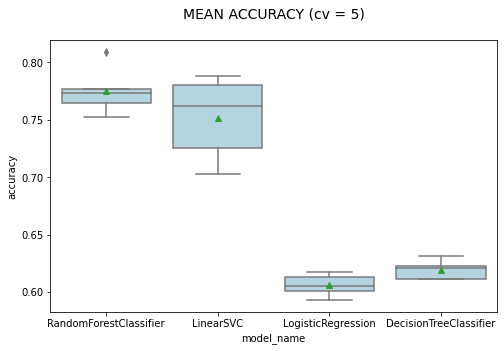

In [100]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=14);

## **Exploring Multi-classification Models**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import pandas as pd

models = [
    RandomForestClassifier(n_estimators=100, random_state=30),
    LinearSVC(),
    LogisticRegression(random_state=0),
    DecisionTreeClassifier()
    ]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X_valF, y_val, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

In [ ]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
DecisionTreeClassifier,0.643830,0.031258
LinearSVC,0.730536,0.055418
LogisticRegression,0.618277,0.017313
RandomForestClassifier,0.799058,0.014745


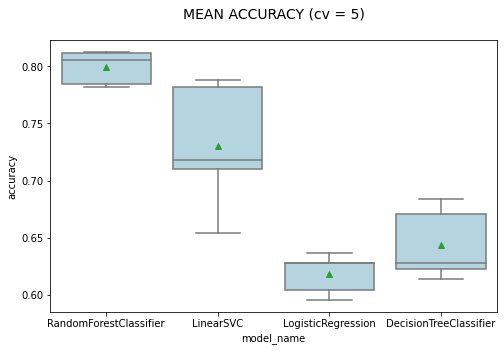

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=14);

## **Create and Fit the Classifier using X_train and y_train**

In [101]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 900, random_state=42) 

model.fit(X_trainF, y_train)
 
# performing predictions on the test dataset
y_pred = model.predict(X_testF)
 

from sklearn import metrics 
accuracy_XtrainF = metrics.accuracy_score(y_test, y_pred)
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", accuracy_XtrainF)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ACCURACY OF THE MODEL:  0.7681451612903226


In [102]:
# Classification report
print('\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred, 
                                    target_names= TestSet['class_name'].unique()))

			CLASSIFICATIION METRICS

              precision    recall  f1-score   support

        adhd       0.81      0.75      0.78       248
  depression       0.77      0.75      0.76       248
     anxiety       0.83      0.64      0.72       248
     bipolar       0.56      0.77      0.65       248
        ptsd       0.90      0.75      0.82       248
        none       0.84      0.94      0.89       248

    accuracy                           0.77      1488
   macro avg       0.79      0.77      0.77      1488
weighted avg       0.79      0.77      0.77      1488



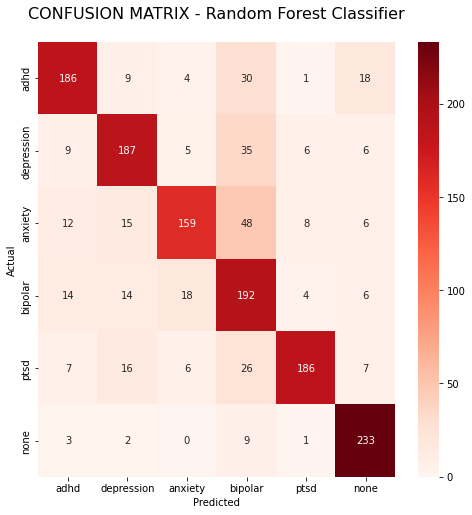

In [103]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Reds", fmt='d',
            xticklabels=class_id_y.class_name.values, 
            yticklabels=class_id_y.class_name.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - Random Forest Classifier\n", size=16);

## **Create and Fit the Classifier using X_train_val and y_train val**





In [104]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 900, random_state=42) 

model.fit(X_train_val, y_train_val)
 
# performing predictions on the test dataset
y_pred = model.predict(X_testF)
 

from sklearn import metrics 
accuracy_Xtrain_val = metrics.accuracy_score(y_test, y_pred)

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", accuracy_Xtrain_val)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ACCURACY OF THE MODEL:  0.9166666666666666


In [105]:
# Classification report
print('\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred, 
                                    target_names= TestSet['class_name'].unique()))

			CLASSIFICATIION METRICS

              precision    recall  f1-score   support

        adhd       0.95      0.90      0.92       248
  depression       0.89      0.90      0.90       248
     anxiety       0.99      0.90      0.94       248
     bipolar       0.80      0.97      0.88       248
        ptsd       0.98      0.84      0.91       248
        none       0.93      0.98      0.95       248

    accuracy                           0.92      1488
   macro avg       0.92      0.92      0.92      1488
weighted avg       0.92      0.92      0.92      1488



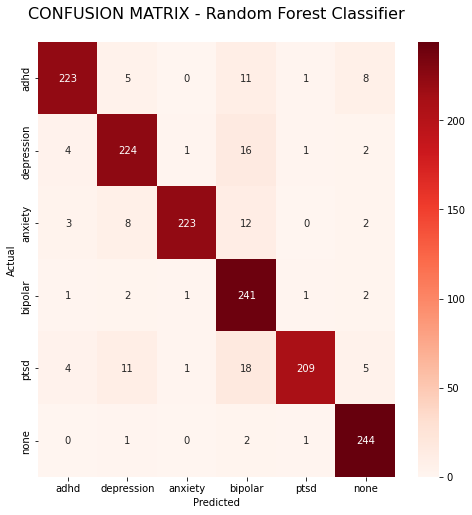

In [106]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Reds", fmt='d',
            xticklabels=class_id_y.class_name.values, 
            yticklabels=class_id_y.class_name.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - Random Forest Classifier\n", size=16);

## **Create and Fit the Classifier using only the TF-IDF features**

In [107]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 900, random_state=42) 

model.fit(tfidf_train_post, y_train)
 
# performing predictions on the test dataset
y_pred = model.predict(tfidf_test_post)
 

from sklearn import metrics 

accuracy_X_tfidf = metrics.accuracy_score(y_test, y_pred)

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", accuracy_X_tfidf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ACCURACY OF THE MODEL:  0.741263440860215


In [108]:
# Classification report
print('\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred, 
                                    target_names= TestSet['class_name'].unique()))

			CLASSIFICATIION METRICS

              precision    recall  f1-score   support

        adhd       0.71      0.74      0.72       248
  depression       0.78      0.70      0.74       248
     anxiety       0.83      0.62      0.71       248
     bipolar       0.53      0.75      0.62       248
        ptsd       0.88      0.72      0.79       248
        none       0.85      0.91      0.88       248

    accuracy                           0.74      1488
   macro avg       0.76      0.74      0.75      1488
weighted avg       0.76      0.74      0.75      1488



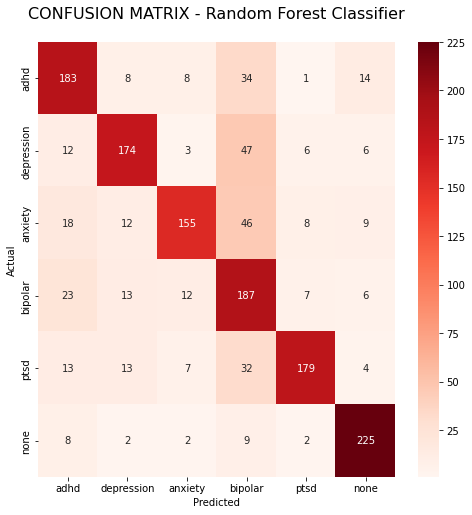

In [109]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Reds", fmt='d',
            xticklabels=class_id_y.class_name.values, 
            yticklabels=class_id_y.class_name.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - Random Forest Classifier\n", size=16);

## **Create and Fit the Classifier using the features extracted without the TFIDF**

In [110]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 900, random_state=42) 

model.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = model.predict(X_test)
 

from sklearn import metrics 
 
accuracy_Xtrain = metrics.accuracy_score(y_test, y_pred)

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", accuracy_Xtrain)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ACCURACY OF THE MODEL:  0.6821236559139785


In [111]:
# Classification report
print('\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred, 
                                    target_names= TestSet['class_name'].unique()))

			CLASSIFICATIION METRICS

              precision    recall  f1-score   support

        adhd       0.71      0.62      0.66       248
  depression       0.72      0.75      0.74       248
     anxiety       0.65      0.55      0.59       248
     bipolar       0.52      0.66      0.58       248
        ptsd       0.83      0.69      0.75       248
        none       0.72      0.82      0.77       248

    accuracy                           0.68      1488
   macro avg       0.69      0.68      0.68      1488
weighted avg       0.69      0.68      0.68      1488



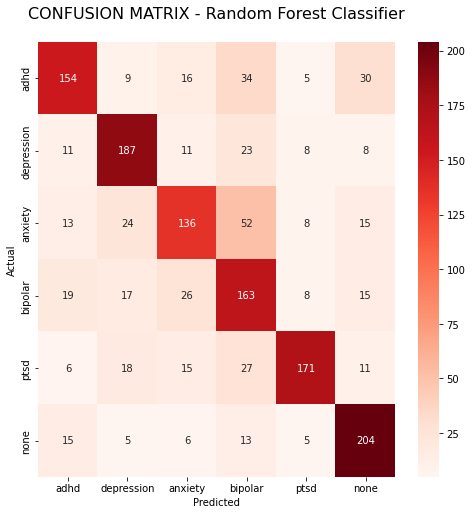

In [112]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Reds", fmt='d',
            xticklabels=class_id_y.class_name.values, 
            yticklabels=class_id_y.class_name.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - Random Forest Classifier\n", size=16);

## **COMPARISONS**

In [113]:
from tabulate import tabulate

trainVal_v_train = [["Training_Validation Set", accuracy_Xtrain_val], 
                    ["TrainingSet only", accuracy_XtrainF]]

col_names = ["Dataset", "Accuracy"]

print(tabulate(trainVal_v_train, headers=col_names, tablefmt="fancy_grid"))

╒═════════════════════════╤════════════╕
│ Dataset                 │   Accuracy │
╞═════════════════════════╪════════════╡
│ Training_Validation Set │   0.916667 │
├─────────────────────────┼────────────┤
│ TrainingSet only        │   0.768145 │
╘═════════════════════════╧════════════╛


In [114]:
featuresE_v_TFIDF = [["Features Extracted", accuracy_Xtrain], 
                    ["TF-IDF", accuracy_X_tfidf]]

col_names = ["Dataset", "Accuracy"]

print(tabulate(featuresE_v_TFIDF, headers=col_names, tablefmt="fancy_grid"))

╒════════════════════╤════════════╕
│ Dataset            │   Accuracy │
╞════════════════════╪════════════╡
│ Features Extracted │   0.682124 │
├────────────────────┼────────────┤
│ TF-IDF             │   0.741263 │
╘════════════════════╧════════════╛


## **Hyperparameter Tuning the Random Forest (Disregard this. It was not used)**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 42) 
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 30, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_val, y_train_val)
rf_random.best_params_

Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [ ]:
#To determine if random search yielded a better model, we compare the base model with the best random search model.

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
base_model.fit(X_valF,y_val)
base_accuracy = evaluate(base_model, X_train_val, y_train_val)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_train_val, y_train_val)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train_val, y_train_val)
grid_search.best_params_

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_train_val, y_train_val)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))